In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 256
LEARNING_RATE = 2e-5
NAME = 'mBert(bert)-sindhi'
MODEL_NAME = 'distilroberta-base'
dir = '../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_texts = train_df['sindhi_text'].values
val_texts = val_df['sindhi_text'].values
test_texts = test_df['sindhi_text'].values

train_labels = train_df['class'].values
val_labels = val_df['class'].values
test_labels = test_df['class'].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

ŸÖÿßŸÜ Ÿá⁄™ ŸÖŸÜŸáŸÜÿ¨Ÿà ŸÜŸä⁄Øÿß ÿ±ŸàŸäŸà ÿ≥ŸàŸàŸàŸà ÿÆÿ±ÿßÿ® ÿ¢ŸáŸä Ÿæÿ± ŸáŸà ŸáŸÖŸäÿ¥Ÿá ÿ∫ÿßÿ± ŸæŸáÿ±ŸäŸÜ cus he kno I stand on bus but lutely üòÇü§£ 1
@khawarkhatana @ashoswai ÿ™ŸàŸáÿßŸÜ ⁄©Ÿä ŸæŸÜŸáŸÜÿ¨Ÿä ŸÜŸÅÿ±ÿ™ €Ω ÿ≠ÿ≥ÿØ ÿ≥ÿßŸÜ ÿ™ŸàŸáÿßŸÜ ⁄©Ÿä ŸøŸàÿ±Ÿà ÿßÿ≥ŸÑÿßŸÖŸà ŸÅŸàÿ®⁄™ POS ⁄èÿ≥Ÿàÿå ŸÑ⁄©ŸäŸÜ ŸáŸÜÿØŸà ŸÖÿ≥ŸÑŸÖÿßŸÜ ŸÇŸàŸÖŸÜ €æ ÿ±ŸáŸÜ Ÿøÿßÿå ŸäŸáŸàÿØŸä ÿ™ÿßÿ±ŸäÿÆŸä ÿ∑Ÿàÿ± ÿ™Ÿä ŸÖÿ≥ŸÑŸÖÿßŸÜŸÜ ÿ≥ÿßŸÜ ÿßŸÖŸÜ €æ ÿ±ŸáŸÜÿØÿß ÿ¢ŸáŸÜÿå ÿß⁄Ñ ÿ®Ÿá ÿßŸÜŸáŸÜ ⁄©Ÿä ⁄™Ÿäÿ™ÿ±ŸÜ ÿ¶Ÿä ŸÖÿ≥ŸÑŸÖÿßŸÜ €Ω ÿπÿ±ÿ® ŸÖŸÑ⁄™ŸÜ €æ ⁄ÄŸÑŸä⁄™ÿßÿ± ÿ¢ŸáŸäÿå ÿßŸáŸà ŸÖÿ∞Ÿáÿ® ÿ®ÿßÿ®ÿ™ ŸÜÿßŸáŸäÿå ÿßÿ≥ÿßŸÜ ÿ≥ÿß⁄≥Ÿäÿß ÿ¢ŸáŸäŸàŸÜ... https://t.co/NvrFlxZucP 1
@dartwalker @GraniteElements ÿ™ŸàŸáÿßŸÜ ⁄©Ÿä ⁄ØŸáÿ±ÿ¨Ÿä!
ŸÖŸàŸÜ ŸáŸÜ ⁄©Ÿä ⁄™ÿ±ÿ≥ŸÖÿ≥ ÿ™Ÿä ŸªÿßŸáÿ± ⁄™⁄çŸäŸà - ÿßŸáŸà ŸÖŸÜŸáŸÜÿ¨Ÿä ÿ≥ŸÑÿßÿ¶Ÿä ÿ®Ÿä⁄Ø €æ ÿ≥ÿßŸÑŸÜ ⁄©ÿßŸÜ ÿß⁄ª⁄Ñÿßÿ™ŸÑ ŸáŸà 0
@EstherMcVey1 ÿßÿ≥ÿßŸÜ ÿßŸÜŸáŸÜ ÿ¨Ÿà ÿ¨Ÿàÿßÿ® Ÿª⁄å⁄ª ÿ¨ÿß ŸÖŸÜÿ™ÿ∏ÿ± ÿ¢ŸáŸäŸàŸÜ (ÿ¨Ÿä⁄™Ÿà ÿ®Ÿá ÿ≥ŸàÿßŸÑ ÿßŸáŸä ÿ™ÿµŸàÿ± ⁄™ŸÜÿØÿß ÿ™Ÿá ÿ™ŸàŸáÿßŸÜ Ÿæ⁄áŸäŸà) 0
ŸáŸä ⁄èÿß⁄çŸà ÿπÿ¨Ÿäÿ

In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="sindhi")
    , train_labels[i])

ŸÖŸÜŸáŸÜÿ¨Ÿà ŸÜŸä⁄Øÿß ÿ±ŸàŸäŸà ÿ≥ŸàŸàŸàŸà ÿÆÿ±ÿßÿ® ÿ¢ŸáŸä Ÿæÿ± ŸáŸÖŸäÿ¥Ÿá ÿ∫ÿßÿ± ŸæŸáÿ±ŸäŸÜ cus he kno i stand on bus but lutely üòÇü§£ 1
khawarkhatana ashoswai ⁄©Ÿä ŸæŸÜŸáŸÜÿ¨Ÿä ŸÜŸÅÿ±ÿ™ ÿ≠ÿ≥ÿØ ÿ≥ÿßŸÜ ⁄©Ÿä ŸøŸàÿ±Ÿà ÿßÿ≥ŸÑÿßŸÖŸà ŸÅŸàÿ®⁄™ pos ⁄èÿ≥Ÿàÿå ŸÑ⁄©ŸäŸÜ ŸáŸÜÿØŸà ŸÖÿ≥ŸÑŸÖÿßŸÜ ŸÇŸàŸÖŸÜ €æ ÿ±ŸáŸÜ Ÿøÿßÿå ŸäŸáŸàÿØŸä ÿ™ÿßÿ±ŸäÿÆŸä ÿ∑Ÿàÿ± ŸÖÿ≥ŸÑŸÖÿßŸÜŸÜ ÿ≥ÿßŸÜ ÿßŸÖŸÜ €æ ÿ±ŸáŸÜÿØÿß ÿ¢ŸáŸÜÿå ÿßŸÜŸáŸÜ ⁄©Ÿä ⁄™Ÿäÿ™ÿ±ŸÜ ÿ¶Ÿä ŸÖÿ≥ŸÑŸÖÿßŸÜ ÿπÿ±ÿ® ŸÖŸÑ⁄™ŸÜ €æ ⁄ÄŸÑŸä⁄™ÿßÿ± ÿ¢ŸáŸäÿå ŸÖÿ∞Ÿáÿ® ÿ®ÿßÿ®ÿ™ ŸÜÿßŸáŸäÿå ÿßÿ≥ÿßŸÜ ÿ≥ÿß⁄≥Ÿäÿß ÿ¢ŸáŸäŸàŸÜ 1
dartwalker graniteelements ⁄©Ÿä ⁄ØŸáÿ±ÿ¨Ÿä ŸÖŸàŸÜ ŸáŸÜ ⁄©Ÿä ⁄™ÿ±ÿ≥ŸÖÿ≥ ŸªÿßŸáÿ± ⁄™⁄çŸäŸà ŸÖŸÜŸáŸÜÿ¨Ÿä ÿ≥ŸÑÿßÿ¶Ÿä ÿ®Ÿä⁄Ø €æ ÿ≥ÿßŸÑŸÜ ⁄©ÿßŸÜ ÿß⁄ª⁄Ñÿßÿ™ŸÑ 0
esthermcvey1 ÿßÿ≥ÿßŸÜ ÿßŸÜŸáŸÜ ÿ¨Ÿà ÿ¨Ÿàÿßÿ® Ÿª⁄å⁄ª ÿ¨ÿß ŸÖŸÜÿ™ÿ∏ÿ± ÿ¢ŸáŸäŸàŸÜ ÿ¨Ÿä⁄™Ÿà ÿ™ÿµŸàÿ± ⁄™ŸÜÿØÿß ÿ™Ÿá Ÿæ⁄áŸäŸà 0
⁄èÿß⁄çŸà ÿπÿ¨Ÿäÿ® ÿ¢ŸáŸä ŸáŸÜ Ÿæÿ±Ÿàÿ¨Ÿä⁄™ŸΩ ⁄©ÿßŸÜ ŸÖÿ™ÿßÿ´ÿ± ÿ¢ŸáŸäÿßŸÜÿå ÿßŸÖŸäÿØ ÿ¢ŸáŸä ÿ™Ÿá ŸáŸÜ ŸàÿßŸÇÿπŸä ÿ≥ÿßŸÜ ⁄™ŸÖŸäŸàŸÜŸΩŸä ÿÆÿßÿµ ÿ∑Ÿàÿ± ÿ≥⁄™Ÿà ⁄™ÿßŸÖŸäÿßÿ®Ÿä ÿ≠ÿßÿµŸÑ ⁄™ŸÜÿ

In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text, language="sindhi") for text in train_texts]
val_texts = [hlp.preprocess_text(text, language="sindhi") for text in val_texts]
test_texts = [hlp.preprocess_text(text, language="sindhi") for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")
model = AutoModelForSequenceClassification.from_pretrained("distilroberta-base", num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 19/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 239/239 [01:23<00:00,  2.87it/s, loss=0.486]


Train loss 0.5583866911951967 accuracy 0.6850779947022466
Validation loss 0.469172303378582 accuracy 0.7564014519768469
Model and tokenizer saved at epoch 19
Checkpoint saved: Improved validation accuracy at epoch 19: 0.7564014519768469
Metrics logged at epoch 19
Epoch 20/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 239/239 [01:23<00:00,  2.87it/s, loss=0.445]


Train loss 0.45458548712431135 accuracy 0.7634978253049479
Validation loss 0.44292524866759775 accuracy 0.777935838320416
Model and tokenizer saved at epoch 20
Checkpoint saved: Improved validation accuracy at epoch 20: 0.777935838320416
Metrics logged at epoch 20
Epoch 21/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 239/239 [01:21<00:00,  2.92it/s, loss=0.429]


Train loss 0.4238598592361147 accuracy 0.7812387586252003
Validation loss 0.4292192872613668 accuracy 0.786373001079172
Model and tokenizer saved at epoch 21
Checkpoint saved: Improved validation accuracy at epoch 21: 0.786373001079172
Metrics logged at epoch 21
Epoch 22/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 239/239 [01:19<00:00,  3.00it/s, loss=0.394]


Train loss 0.4026468296430101 accuracy 0.7951371856502829
Validation loss 0.4159839555621147 accuracy 0.7938290984008634
Model and tokenizer saved at epoch 22
Checkpoint saved: Improved validation accuracy at epoch 22: 0.7938290984008634
Metrics logged at epoch 22
Epoch 23/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 239/239 [01:20<00:00,  2.96it/s, loss=0.377]


Train loss 0.3804842307228424 accuracy 0.8099839759311946
Validation loss 0.4107223242521286 accuracy 0.796477975080938
Model and tokenizer saved at epoch 23
Checkpoint saved: Improved validation accuracy at epoch 23: 0.796477975080938
Metrics logged at epoch 23
Epoch 24/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 239/239 [01:20<00:00,  2.97it/s, loss=0.36] 


Train loss 0.36186824445943955 accuracy 0.8203342162922267
Validation loss 0.4136480648070574 accuracy 0.8001569704699304
Model and tokenizer saved at epoch 24
Checkpoint saved: Improved validation accuracy at epoch 24: 0.8001569704699304
Metrics logged at epoch 24
Epoch 25/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 239/239 [01:20<00:00,  2.96it/s, loss=0.366]


Train loss 0.3452351964916644 accuracy 0.8303737859315217
Validation loss 0.43349520601332187 accuracy 0.792700873148239
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 25
Epoch 26/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 239/239 [01:21<00:00,  2.95it/s, loss=0.321]


Train loss 0.3281045741241846 accuracy 0.8395794499493117
Validation loss 0.4333631359040737 accuracy 0.7974099872461493
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 26
Epoch 27/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 239/239 [01:21<00:00,  2.94it/s, loss=0.342]


Train loss 0.30835656622214297 accuracy 0.8501259033977566
Validation loss 0.4338704634457827 accuracy 0.8008927695477288
Model and tokenizer saved at epoch 27
Checkpoint saved: Improved validation accuracy at epoch 27: 0.8008927695477288
Metrics logged at epoch 27
Epoch 28/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 239/239 [01:19<00:00,  2.99it/s, loss=0.344]


Train loss 0.2978614195869558 accuracy 0.8542954315052814
Validation loss 0.451711567863822 accuracy 0.789953889924458
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 28
Epoch 29/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 239/239 [01:22<00:00,  2.90it/s, loss=0.293]


Train loss 0.2832893166831348 accuracy 0.8621112528205631
Validation loss 0.4630081906914711 accuracy 0.7946630040223683
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 29
Epoch 30/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 239/239 [01:20<00:00,  2.95it/s, loss=0.3]  


Train loss 0.2724329924608374 accuracy 0.8670165800058864
Validation loss 0.4779019583016634 accuracy 0.7822034729716473
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 30
Epoch 31/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 239/239 [01:21<00:00,  2.94it/s, loss=0.281]


Train loss 0.26479347829539407 accuracy 0.8717256941037967
Validation loss 0.443585904315114 accuracy 0.7932895124104778
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 31
Epoch 32/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 239/239 [01:22<00:00,  2.90it/s, loss=0.411]


Train loss 0.25847170542473574 accuracy 0.8747506458680795
Validation loss 0.5064629349857569 accuracy 0.8000588639262239
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


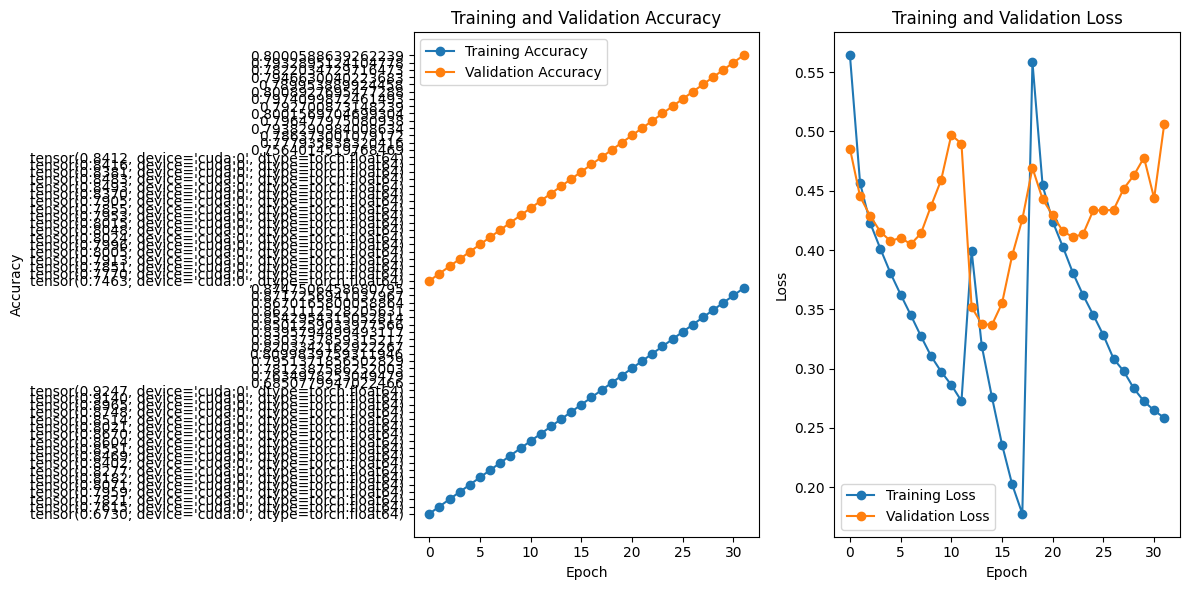

In [9]:
hlp.plot_history(history)

In [10]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.7992348064943346 Test Loss: 0.5104732401669025


Accuracy: 0.8
F1 Score: 0.8
Precision: 0.8
Recall: 0.8

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.82      0.79      0.80     10550
        Hate       0.78      0.81      0.80      9837

    accuracy                           0.80     20387
   macro avg       0.80      0.80      0.80     20387
weighted avg       0.80      0.80      0.80     20387



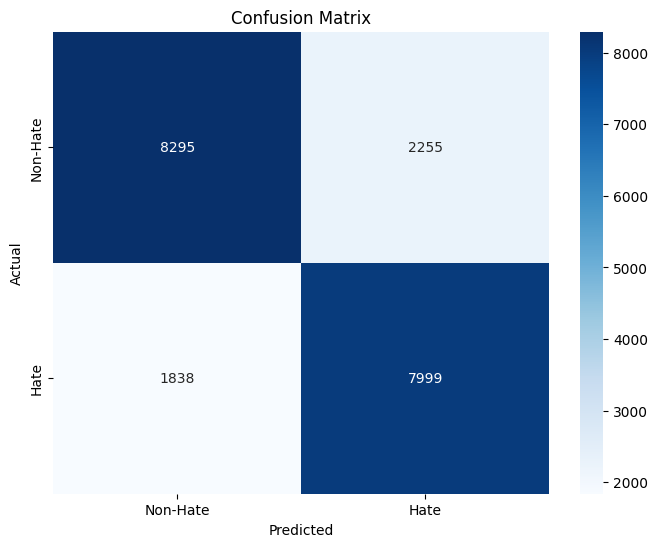

In [11]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [12]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Hate Speech 
Confidence: 1.00
